In [13]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml

In [14]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
X = mnist.data
y = mnist.target.astype(np.uint8)

In [55]:
y[0]

5

In [56]:
first = X[0].reshape(28, 28)

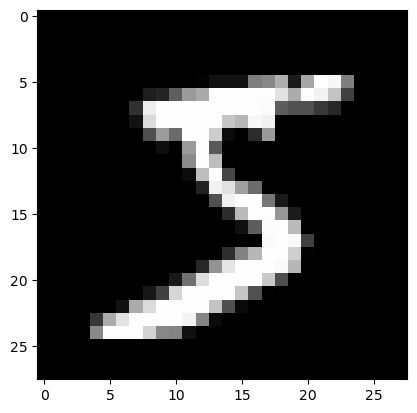

In [57]:
import matplotlib.pyplot as plt

plt.imshow(first, cmap='binary_r')

In [63]:
X_train, X_test = X[:6000], X[6000:7000]
y_train, y_test = y[:6000], y[6000:7000]

In [65]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_train_trans = std.fit_transform(X_train)
X_test_trans = std.transform(X_test)

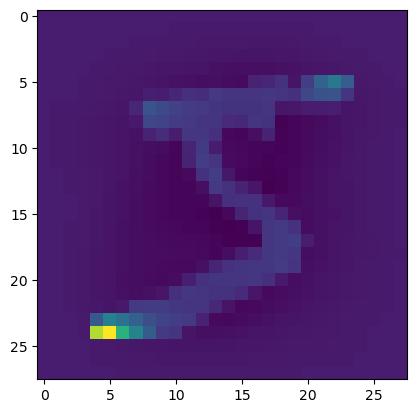

In [67]:
first_trans = X_train_trans[0].reshape(28, 28)
plt.imshow(first_trans)

In [68]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
lin_svc = LinearSVC()

svc.fit(X_train, y_train)
lin_svc.fit(X_train, y_train)

c:\Users\olofs\anaconda3\envs\machine_learning\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [69]:
ypred_svc_unscaled = svc.predict(X_test)
ypred_lin_svc_unscaled = lin_svc.predict(X_test)

In [70]:
svc_trans = SVC()
lin_svc_trans = LinearSVC()

svc_trans.fit(X_train_trans, y_train)
lin_svc_trans.fit(X_train_trans, y_train)

c:\Users\olofs\anaconda3\envs\machine_learning\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [71]:
ypred_svc_trans = svc_trans.predict(X_test_trans)
ypred_lin_svc_trans = lin_svc_trans.predict(X_test_trans)

In [72]:
from sklearn.metrics import accuracy_score

score_svc_unscaled = accuracy_score(y_test, ypred_svc_unscaled)
score_lin_svc_unscaled = accuracy_score(y_test, ypred_lin_svc_unscaled)
score_svc_trans = accuracy_score(y_test, ypred_svc_trans)
score_lin_svc_trans = accuracy_score(y_test, ypred_lin_svc_trans)

print(score_svc_unscaled, score_lin_svc_unscaled, score_svc_trans, score_lin_svc_trans)

0.953 0.86 0.92 0.842


In [73]:
from sklearn.ensemble import RandomForestClassifier

rnd_unscaled = RandomForestClassifier()
rnd_trans = RandomForestClassifier()

rnd_unscaled.fit(X_train, y_train)
rnd_trans.fit(X_train_trans, y_train)

RandomForestClassifier()

In [78]:
ypred_rnd_unscaled = rnd_unscaled.predict(X_test)
ypred_rnd_trans = rnd_trans.predict(X_test_trans)

In [83]:
score_rnd_unscaled = accuracy_score(y_test, ypred_rnd_unscaled)
score_rnd_trans = accuracy_score(y_test, ypred_rnd_trans)

In [84]:
print(score_rnd_unscaled, score_rnd_trans)

0.941 0.944


In [96]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV


best_c_list = []
best_c_value_list = []
best_c = 0
best_c_value = 0
for c in (1, 2, 3, 4, 5):
    svc = SVC(C=c)
    svc.fit(X_train, y_train)
    # predictions = svc.predict(X_test)
    score = svc.score(X_test, y_test)
    best_c_list.append(c)
    best_c_value_list.append(score)
    if score > best_c_value:
        best_c = c
        best_c_value = score



In [97]:
print(best_c_list, best_c_value_list)

[1, 2, 3, 4, 5] [0.953, 0.957, 0.954, 0.953, 0.954]


In [98]:
print(best_c, best_c_value)

2 0.957


In [104]:
best_g_list = []
best_g_value_list = []
best_g = 0
best_g_value = 0
for g in np.arange(1, 10, 2):
    svc2 = SVC(C=2, gamma=g)
    svc2.fit(X_train, y_train)
    # predictions = svc.predict(X_test)
    score = svc2.score(X_test, y_test)
    best_g_list.append(g)
    best_g_value_list.append(score)
    if score > best_g_value:
        best_g = g
        best_g_value = score


In [105]:
print(best_g_list, best_g_value_list)

[1, 3, 5, 7, 9] [0.113, 0.113, 0.113, 0.113, 0.113]


In [103]:
svc3 = SVC(C=2, gamma=0.2)

svc3.fit(X_train, y_train)
print(svc3.score(X_test, y_test))



0.113
